### `Text` Summarization using NLP 

Watch Full Video: https://youtu.be/9PoKellNrBc

#### What is text summarization 

Text summarization is the process of distilling the most important information from a source text.

#### Why automatic text summarization 

- Summaries reduce reading time.
- When researching documents, summaries make the selection process easier.
- Automatic summarization improves the effectiveness of indexing.
- Automatic summarization algorithms are less biased than human summarizers.
- Personalized summaries are useful in question-answering systems as they provide personalized information.
- Using automatic or semi-automatic summarization systems enables commercial abstract services to - increase the number of text documents they are able to process.

#### Type of summarization 

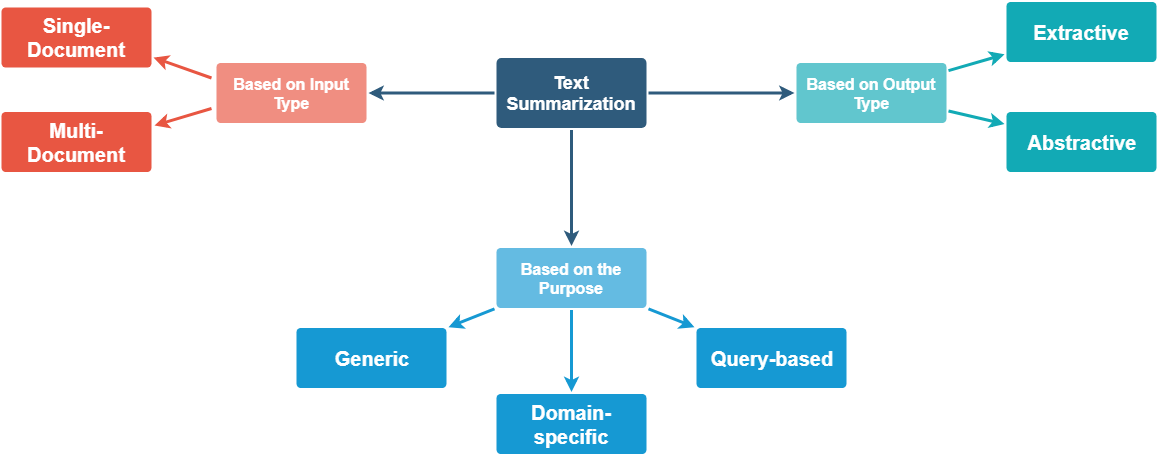

#### How to do text summarization 

- Text cleaning
- Sentence Tokenization
- Word tokenization
- Word-frequency table
- Summarization

#### Text 

In [7]:
text = """
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.
Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[3] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured.
"""

### Let's Get Started with `SpaCy` 

In [ ]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [4]:
stopwords = list(STOP_WORDS)

In [5]:
nlp = spacy.load('en_core_web_sm')

In [8]:
doc = nlp(text)

In [9]:
tokens = [token.text for token in doc]
print(tokens)

['\n', 'There', 'are', 'broadly', 'two', 'types', 'of', 'extractive', 'summarization', 'tasks', 'depending', 'on', 'what', 'the', 'summarization', 'program', 'focuses', 'on', '.', 'The', 'first', 'is', 'generic', 'summarization', ',', 'which', 'focuses', 'on', 'obtaining', 'a', 'generic', 'summary', 'or', 'abstract', 'of', 'the', 'collection', '(', 'whether', 'documents', ',', 'or', 'sets', 'of', 'images', ',', 'or', 'videos', ',', 'news', 'stories', 'etc', '.', ')', '.', 'The', 'second', 'is', 'query', 'relevant', 'summarization', ',', 'sometimes', 'called', 'query', '-', 'based', 'summarization', ',', 'which', 'summarizes', 'objects', 'specific', 'to', 'a', 'query', '.', 'Summarization', 'systems', 'are', 'able', 'to', 'create', 'both', 'query', 'relevant', 'text', 'summaries', 'and', 'generic', 'machine', '-', 'generated', 'summaries', 'depending', 'on', 'what', 'the', 'user', 'needs', '.', '\n', 'An', 'example', 'of', 'a', 'summarization', 'problem', 'is', 'document', 'summarizatio

In [11]:
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [12]:
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [14]:
print(word_frequencies)

{'broadly': 1, 'types': 1, 'extractive': 1, 'summarization': 11, 'tasks': 1, 'depending': 2, 'program': 1, 'focuses': 2, 'generic': 3, 'obtaining': 1, 'summary': 4, 'abstract': 2, 'collection': 3, 'documents': 2, 'sets': 1, 'images': 3, 'videos': 3, 'news': 4, 'stories': 1, 'etc': 1, 'second': 1, 'query': 4, 'relevant': 2, 'called': 2, 'based': 1, 'summarizes': 1, 'objects': 1, 'specific': 1, 'Summarization': 1, 'systems': 1, 'able': 1, 'create': 1, 'text': 1, 'summaries': 2, 'machine': 1, 'generated': 1, 'user': 1, 'needs': 1, 'example': 3, 'problem': 2, 'document': 4, 'attempts': 1, 'automatically': 3, 'produce': 1, 'given': 2, 'interested': 1, 'generating': 1, 'single': 1, 'source': 2, 'use': 1, 'multiple': 1, 'cluster': 1, 'articles': 3, 'topic': 2, 'multi': 1, 'related': 2, 'application': 2, 'summarizing': 1, 'Imagine': 1, 'system': 3, 'pulls': 1, 'web': 1, 'concisely': 1, 'represents': 1, 'latest': 1, 'Image': 1, 'automatic': 1, 'consists': 1, 'selecting': 1, 'representative': 2,

In [15]:
max_frequency = max(word_frequencies.values())

In [16]:
max_frequency

11

In [17]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency

In [18]:
print(word_frequencies)

{'broadly': 0.09090909090909091, 'types': 0.09090909090909091, 'extractive': 0.09090909090909091, 'summarization': 1.0, 'tasks': 0.09090909090909091, 'depending': 0.18181818181818182, 'program': 0.09090909090909091, 'focuses': 0.18181818181818182, 'generic': 0.2727272727272727, 'obtaining': 0.09090909090909091, 'summary': 0.36363636363636365, 'abstract': 0.18181818181818182, 'collection': 0.2727272727272727, 'documents': 0.18181818181818182, 'sets': 0.09090909090909091, 'images': 0.2727272727272727, 'videos': 0.2727272727272727, 'news': 0.36363636363636365, 'stories': 0.09090909090909091, 'etc': 0.09090909090909091, 'second': 0.09090909090909091, 'query': 0.36363636363636365, 'relevant': 0.18181818181818182, 'called': 0.18181818181818182, 'based': 0.09090909090909091, 'summarizes': 0.09090909090909091, 'objects': 0.09090909090909091, 'specific': 0.09090909090909091, 'Summarization': 0.09090909090909091, 'systems': 0.09090909090909091, 'able': 0.09090909090909091, 'create': 0.0909090909

In [19]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[
There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on., The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.)., The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query., Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
, An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document., Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic)., This problem is called multi-document summarization., A related application 

In [20]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [21]:
sentence_scores

{
 There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.: 2.818181818181818,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).: 3.9999999999999987,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.: 3.909090909090909,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.: 3.09090909090909,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.: 3.9999999999999996,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of artic

In [22]:
from heapq import nlargest

In [23]:
select_length = int(len(sentence_tokens)*0.3)
select_length

4

In [24]:
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)

In [25]:
summary

[An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.]

In [26]:
final_summary = [word.text for word in summary]

In [28]:
summary = ' '.join(final_summary)

In [31]:
print(text)


There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summar

In [30]:
print(summary)

An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.



In [32]:
len(text)

1869

In [33]:
len(summary)

605